# ARIMA (AutoRegressive Integrated Moving Average)

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. <br> It is a class of model that captures a suite of different standard temporal structures in time series data

<b> AR </b>: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. <br>
<b> I </b>: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary. <br>
<b> MA</b> : Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

The parameters of the ARIMA model are defined as follows: <br>

<b> p: </b> The number of lag observations included in the model, also called the lag order. <br>
<b> d: </b> The number of times that the raw observations are differenced, also called the degree of differencing. <br>
<b> q: </b> The size of the moving average window, also called the order of moving average

In [3]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [5]:
df_airline = pd.read_csv('AirPassengers.csv')

In [6]:
df_airline.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df_airline.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [8]:
#let us check if we have any null value
df_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
#perfect we don't have any null value
#let us check info of data

df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [10]:
#ok so here our month is object.  we have to convert this into datetime

df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [11]:
#let us check now
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
#awesome we have converted Month object into datetie
df_airline.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [13]:
#now we have to convert this month column as our index

df_airline.set_index('Month', inplace=True)

In [14]:
df_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

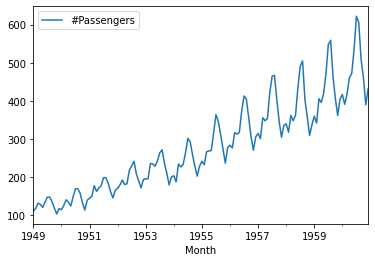

In [15]:
#great its now index ! let us just plot it

df_airline.plot()

so you can see, this is seasonal data. As we can spot a trend. <br>
Hence, this data cannot be stationary, everything is increasing. <br>
Hence we will apply dickyfuller test.



In [17]:
from statsmodels.tsa.stattools import adfuller

In [36]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics : {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <=0.05: 
        print("strong evidence against null hypothesis, reject null hypothesis")
    else:
        print("weak evidence against null hypothesis, times series has unit root indicating it is non-stationary")

In [37]:
adf_test(df_airline['#Passengers'])   #giving the data to the function

ADF Statistics : 0.8153688792060482
p- value: 0.991880243437641
weak evidence against null hypothesis, times series has unit root indicating it is non-stationary


In [38]:
#Use  Differencing to make it stationary 
#here we are using difference of one day hence using shift(1)

df_airline['Passenger Differencing']=df_airline['#Passengers']-df_airline['#Passengers'].shift(1)  #differencing of one day

In [39]:
df_airline.head()

,#Passengers,Passenger Differencing
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [40]:
adf_test(df_airline['Passenger Differencing'].dropna())

ADF Statistics : -2.8292668241699994
p- value: 0.0542132902838255
weak evidence against null hypothesis, times series has unit root indicating it is non-stationary


In [ ]:
#again the null hypothesis is reject indicating it non-stationary
#so we will use the differencing again

In [50]:
df_airline['Second Differencing']=df_airline['Passenger Differencing']-df_airline['Passenger Differencing'].shift(1)  #differencing of one day

In [51]:
adf_test(df_airline['Second Differencing'].dropna())

ADF Statistics : -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against null hypothesis, reject null hypothesis


In [54]:
#so now we have strong evidence against null hypothsis
#it means we have our 'd' value of 2. becuase we have done second differencing
#but seasonal data we have to do it for 12 times

In [56]:
df_airline['12 Differencing']=df_airline['Passenger Differencing']-df_airline['Passenger Differencing'].shift(12)  #differencing of one day

In [57]:
adf_test(df_airline['12 Differencing'].dropna())

ADF Statistics : -15.595618083746334
p- value: 1.8565116001234708e-28
strong evidence against null hypothesis, reject null hypothesis


In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

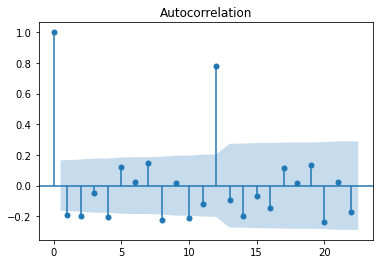

In [60]:
acf = plot_acf(df_airline['Second Differencing'].dropna())

In [ ]:
#this autocorrelation (Pearson Correlation) provides how the variable are 
#related to eachother. 

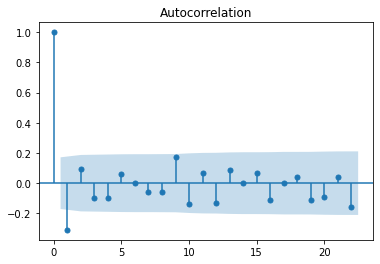

In [63]:
#for 12 months if we plot autocorrelation we will get the q-value oru q value is 1 and 7 also
#ACF is actually performing Moving Average
acf12 = plot_acf(df_airline['12 Differencing'].dropna())

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


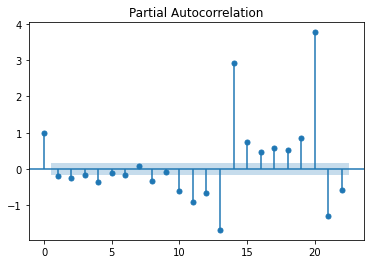

In [61]:
pacf = plot_pacf(df_airline['Second Differencing'].dropna())

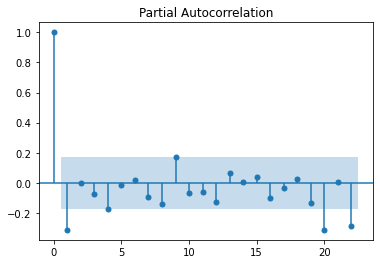

In [64]:
#pacf with respect to 12 months our p-value will be , 8, 20 and 22
pacf = plot_pacf(df_airline['12 Differencing'].dropna())

In [66]:
#the pacf gives us P- value (Autorgression)

In [67]:
#Split our data into train and test

In [98]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [99]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [100]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [101]:
test_data

,#Passengers,Passenger Differencing,Second Differencing,3rd Differencing,12 Differencing
Month,,,,,
1956-01-01,284,6.0,-35.0,-550.0,-7.0
1956-02-01,277,-7.0,-13.0,-575.0,2.0
1956-03-01,317,40.0,47.0,-514.0,6.0
1956-04-01,313,-4.0,-44.0,-638.0,-6.0
1956-05-01,318,5.0,9.0,-621.0,4.0
1956-06-01,374,56.0,51.0,-580.0,11.0
1956-07-01,413,39.0,-17.0,-709.0,-10.0
1956-08-01,405,-8.0,-47.0,-834.0,9.0
1956-09-01,355,-50.0,-42.0,-860.0,-15.0


In [102]:
#Let us create the ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

In [103]:
train_data

,#Passengers,Passenger Differencing,Second Differencing,3rd Differencing,12 Differencing
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,-218.0,NaN
1949-03-01,132,14.0,8.0,-222.0,NaN
1949-04-01,129,-3.0,-17.0,-267.0,NaN
1949-05-01,121,-8.0,-5.0,-266.0,NaN
...,...,...,...,...,...
1955-08-01,347,-17.0,-66.0,-745.0,-8.0
1955-09-01,312,-35.0,-18.0,-729.0,-1.0
1955-10-01,274,-38.0,-3.0,-662.0,-8.0


In [106]:
model_ARIMA=ARIMA(train_data['#Passengers'],order=(10,2,0))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [107]:
model_Arima_fit=model_ARIMA.fit()

In [108]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                   82
Model:                ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                       css-mle   S.D. of innovations             18.333
Date:                Mon, 22 Aug 2022   AIC                            738.477
Time:                        20:13:18   BIC                            767.358
Sample:                    03-01-1949   HQIC                           750.072
                         - 12-01-1955                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0164      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.#Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.#Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.#Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.#Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.#Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.#Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.#Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.#Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.#Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.#Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

In [109]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [110]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

<AxesSubplot:ylabel='Density'>

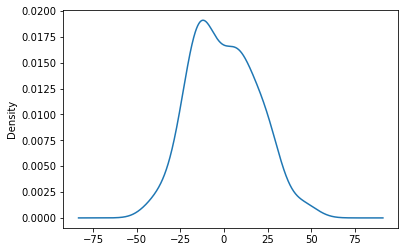

In [111]:
model_Arima_fit.resid.plot(kind='kde')

In [112]:
test_data['Predicted_ARIMA']=pred

<ipython-input-112-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

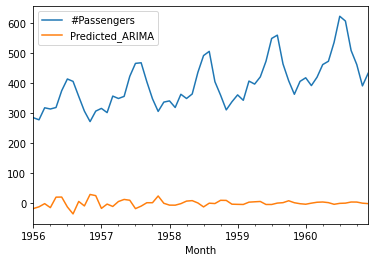

In [113]:
test_data[['#Passengers','Predicted_ARIMA']].plot()

In [ ]:
#Ok ...! something is wrong here.. this isn't what we want
#Lets try SARIMA


In [114]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [115]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [116]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [117]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Mon, 22 Aug 2022   AIC                            548.481
Time:                                     20:15:12   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5991      0.938      0.639      0.523      -1.239       2.437
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4533      0.894     -0.507      0.612      -2.205       1.299
ma.L1          0.1830      1.165      0.157      0.875      -2.101       2.466
ma.L2         -0.5349      1.263     -0.423      0.672      -3.011       1.941
ma.L3         -0.0985      0.384     -0.256      0.798      -0.852       0.655
ma.L4         -0.1271      0.338     -0.377      0.706      -0.789       0.534
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.947
sigma2        87.7264     81.195      1.080      0.280     -71.414     246.866
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [118]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [120]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['#Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

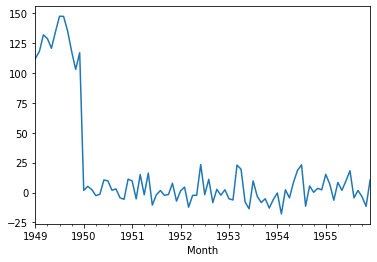

In [121]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

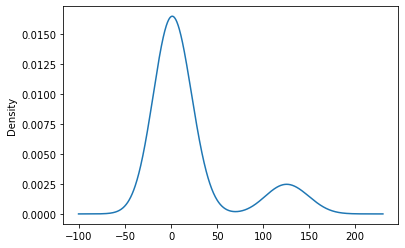

In [122]:
model_SARIMA_fit.resid.plot(kind='kde')

In [123]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-123-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='Month'>

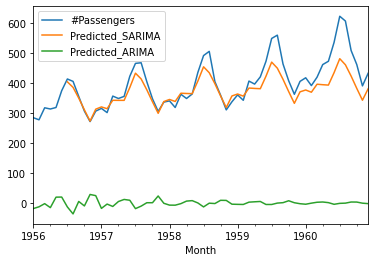

In [125]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

Great! <br>
This is better...! But there's an issue with ARIMA becuase its a seasonal data. <br>
that can be one possibility  <br>
But for SARIMA there's much problem.